In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib inline
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from autils import plt_act_trio
from lab_utils_relu import *
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

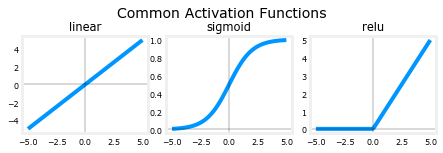

In [7]:
def plt_act_trio():
    X=np.linspace(-5,5,100)
    fig,ax=plt.subplots(1,3,figsize=(6,2))
    ax[0].plot(X,tf.keras.activations.linear(X))
    ax[0].axvline(0,lw=0.3,c='black')
    ax[0].axhline(0,lw=0.3,c='black')
    ax[0].set_title('linear')
    ax[1].plot(X,tf.keras.activations.sigmoid(X))
    ax[1].axvline(0,lw=0.3,c='black')
    ax[1].axhline(0,lw=0.3,c='black')
    ax[1].set_title('sigmoid')
    ax[2].plot(X,tf.keras.activations.relu(X))
    ax[2].axhline(0,lw=0.3,c='black')
    ax[2].axvline(0,lw=0.3,c='black')
    ax[2].set_title('relu')
    fig.suptitle('Common Activation Functions',fontsize=14)
    fig.tight_layout(pad=0.2)
    plt.show()
plt_act_trio()

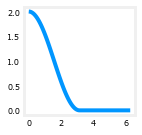

In [10]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
y[50:100]=0
fig,ax = plt.subplots(1,1, figsize=(2,2))
ax.plot(X,y)
plt.show()

In [39]:
X.reshape(-1,1).shape

(100, 1)

In [43]:
 d10

In [173]:
w10=np.array([[-1]])
d10=np.array([2.6])
d10=Dense(1,activation='linear',input_shape=(1,),weights=[w10,b10])  #weights and input_shape here are all kwarg for Dense class
z10=d10(X.reshape(-1,1)) #dot product(dot(input, kernel)) --> so X needs to be reshaped as (-1,1)
a10 = relu(z10)

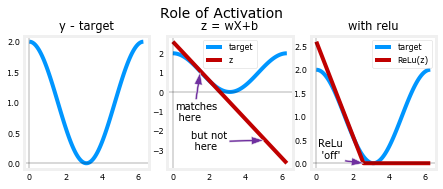

In [79]:
def plt_act1(y,z,a):
    fig,ax = plt.subplots(1,3, figsize=(6,2.5))
    widgvis(fig)
    ax[0].plot(X,y,label="target")
    ax[0].axvline(0, lw=0.3, c="black")
    ax[0].axhline(0, lw=0.3, c="black")
    ax[0].set_title("y - target")
    ax[1].plot(X,y, label="target")
    ax[1].plot(X,z, c=dlc["dldarkred"],label="z")
    ax[1].axvline(0, lw=0.3, c="black")
    ax[1].axhline(0, lw=0.3, c="black")
    ax[1].set_title("z = wX+b")
    ax[1].legend(loc="upper center")
    ax[2].plot(X,y, label="target")
    ax[2].plot(X,a, c=dlc["dldarkred"],label="ReLu(z)")
    ax[2].axhline(0, lw=0.3, c="black")
    ax[2].axvline(0, lw=0.3, c="black")
    ax[2].set_title("with relu")
    ax[2].legend()
    fig.suptitle("Role of Activation", fontsize=14)
    fig.tight_layout(pad=0.2)
    return(ax)


def plt_add_notation(ax):
    ax[1].annotate(text = "matches\n here", xy =(1.5,1.0), 
                   xytext = (0.1,-1.5), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    ax[1].annotate(text = "but not\n here", xy =(5,-2.5), 
                   xytext = (1,-3), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    ax[2].annotate(text = "ReLu\n 'off'", xy =(2.6,0), 
                   xytext = (0.1,0.1), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    
ax = plt_act1(y,z10,a10)
plt_add_notation(ax)

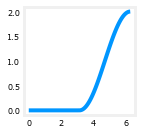

In [49]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
y[0:49]=0
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
plt.show()

array([<AxesSubplot:title={'center':'y - target'}>,
       <AxesSubplot:title={'center':'z = wX+b'}>,
       <AxesSubplot:title={'center':'with relu'}>], dtype=object)

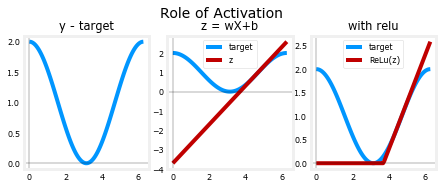

In [174]:
w11 = np.array([[1]])
b11 = np.array([-3.7])
d11 = Dense(1, activation = "linear", input_shape = (1,), weights=[w11,b11])
z11 = d11(X.reshape(-1,1))
a11 = relu(z11)
plt_act1(y,z11,a11)

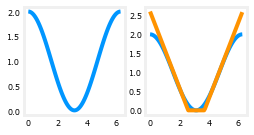

In [161]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
X=X.reshape(-1,1)
yhat = relu(d10(X)) + relu(d11(X))

fig,ax = plt.subplots(1,2, figsize=(4,2))
widgvis(fig)
ax[0].plot(X,y)
ax[1].plot(X,y)
ax[1].plot(X,yhat)
plt.show()

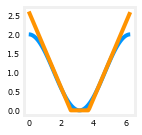

In [163]:
#X=X.reshape(-1,1)
yhat = relu(d10(X)) + relu(d11(X))
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
ax.plot(X,yhat)
plt.show()

## Write as a model

In [176]:
model0=Sequential([
    d10,
    tf.keras.layers.Activation('relu'),#Applies an activation function to an output.(which is the previous d10 output)
    d11,
    tf.keras.layers.Activation('relu'),
    Dense(1,activation='linear')
    
])
model0.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.Adam(0.1))
model0.fit(X,y,epochs=300)

In [167]:
model = Sequential(
    [ 
        Dense(3,activation="relu", name = 'l1'),
        Dense(1,activation="linear", name = 'l2')
    ]
)
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X,y,
    epochs=1000
)

Epoch 1/1000
4/4 [==============================] - 0s 9ms/step - loss: 5.1431
Epoch 2/1000
4/4 [==============================] - 0s 7ms/step - loss: 3.6208
Epoch 3/1000
4/4 [==============================] - 0s 5ms/step - loss: 2.5791
Epoch 4/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.8561
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.4548
Epoch 6/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.2310

2022-07-24 18:53:22.166142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 9ms/step - loss: 1.1887
Epoch 7/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.0625
Epoch 8/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.9992
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.9737
Epoch 10/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.9582
Epoch 11/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.9478
Epoch 12/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.9411
Epoch 13/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.9314
Epoch 14/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.9200
Epoch 15/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.9083
Epoch 16/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.8949
Epoch 17/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.8825
Epoch 18/1000
4/4 [==============================] - 0s 6

4/4 [==============================] - 0s 5ms/step - loss: 0.4959
Epoch 109/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4951
Epoch 110/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.4936
Epoch 111/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4928
Epoch 112/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4916
Epoch 113/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4899
Epoch 114/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4888
Epoch 115/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4879
Epoch 116/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4866
Epoch 117/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4854
Epoch 118/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4848
Epoch 119/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4838
Epoch 120/1000
4/4 [=======================

4/4 [==============================] - 0s 5ms/step - loss: 0.3746
Epoch 210/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3742
Epoch 211/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3737
Epoch 212/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3730
Epoch 213/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3721
Epoch 214/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3723
Epoch 215/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3731
Epoch 216/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3716
Epoch 217/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3704
Epoch 218/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3728
Epoch 219/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3731
Epoch 220/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3711
Epoch 221/1000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 0.3239
Epoch 311/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3216
Epoch 312/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3194
Epoch 313/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3167
Epoch 314/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3137
Epoch 315/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3112
Epoch 316/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3081
Epoch 317/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3045
Epoch 318/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3011
Epoch 319/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2974
Epoch 320/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2931
Epoch 321/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2899
Epoch 322/1000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 0.0159
Epoch 412/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0144
Epoch 413/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0141
Epoch 414/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0136
Epoch 415/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0132
Epoch 416/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0128
Epoch 417/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0129
Epoch 418/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0124
Epoch 419/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0120
Epoch 420/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0116
Epoch 421/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 422/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0112
Epoch 423/1000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 513/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 514/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 515/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 516/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 517/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 518/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 519/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 520/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 521/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 522/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 523/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 524/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 614/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 615/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 616/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0113
Epoch 617/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0087
Epoch 618/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 619/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 620/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 621/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 622/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 623/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 624/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 625/1000
4/4 [=======================

4/4 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 715/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0100
Epoch 716/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0075
Epoch 717/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 718/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0093
Epoch 719/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 720/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0062
Epoch 721/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0082
Epoch 722/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0101
Epoch 723/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 724/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0086
Epoch 725/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 726/1000
4/4 [=======================

4/4 [==============================] - 0s 5ms/step - loss: 0.0082
Epoch 816/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0069
Epoch 817/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0108
Epoch 818/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0198
Epoch 819/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0149
Epoch 820/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0112
Epoch 821/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0177
Epoch 822/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0216
Epoch 823/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 824/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0128
Epoch 825/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0075
Epoch 826/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 827/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 917/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 918/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 919/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 920/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 921/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 922/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 923/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 924/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 925/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 926/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 927/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 928/1000
4/4 [=======================

In [179]:
yhat = model.predict(X)
yhat[0:5]

4/4 [==============================] - 0s 7ms/step


array([[1.97],
       [1.97],
       [1.97],
       [1.97],
       [1.97]], dtype=float32)

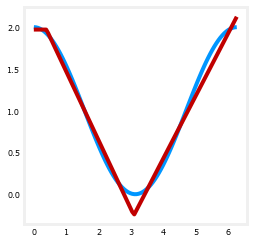

In [180]:
fig,ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(X,y)
ax.plot(X,yhat, c=dlc["dldarkred"])
plt.show()

In [181]:
l1 = model.get_layer('l1')
l2 = model.get_layer('l2')
l1.get_weights()
#l2.get_weights()

[array([[-0.46,  0.91,  0.88]], dtype=float32),
 array([ 0.  , -0.36, -2.71], dtype=float32)]